In [1]:
import numpy as np
import matplotlib.pyplot as plt
from syserol.tensor import perform_CMTF
from syserol.regression import function_prediction
from syserol.classify import class_predictions

In [2]:
tFac, _, _ = perform_CMTF()
X = tFac.factors[0]

In [6]:
perf = class_predictions(X)[1]
perfLO = np.zeros(X.shape[1])

for ii in range(X.shape[1]):
    XX = np.delete(X.copy(), ii, axis=1)
    perfLO[ii] = class_predictions(XX)[1]

print(perf - perfLO)

[ 0.01104972  0.          0.         -0.01104972  0.          0.02762431
  0.01657459  0.01657459  0.00552486  0.01104972]


In [38]:
perf = function_prediction(X, function="ADCD")[2]
perfLO = np.zeros(X.shape[1])

for ii in range(X.shape[1]):
    XX = np.delete(X.copy(), ii, axis=1)
    perfLO[ii] = function_prediction(XX, function="MIP1b")[2]

print(perf - perfLO)

[0.10617154 0.10320082 0.1155962  0.1006543  0.09753775 0.13910283
 0.10423759 0.1077699  0.1012046  0.09972312]


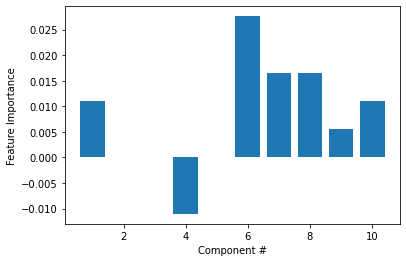

In [7]:
plt.bar(np.arange(1, X.shape[1]+1), perf - perfLO);
plt.ylabel("Feature Importance")
plt.xlabel("Component #");

In [24]:
from syserol.dataImport import functions
import pandas as pd
perf = class_predictions(X)[1]
perfLO = np.zeros(X.shape[1])

for ii in range(X.shape[1]):
    XX = np.delete(X.copy(), ii, axis=1)
    perfLO[ii] = class_predictions(XX)[1]
data = {"Feature Importance": perf - perfLO, "Component Number": np.arange(1, X.shape[1]+1)}
class_df = pd.DataFrame(data)

funcs = []
for function in functions:
    perf = function_prediction(X, function=function)[2]
    perfLO = np.zeros(X.shape[1])

    for ii in range(X.shape[1]):
        XX = np.delete(X.copy(), ii, axis=1)
        perfLO[ii] = function_prediction(XX, function="MIP1b")[2]
    funcs.extend(perf - perfLO)
data = {"Feature Importance": funcs, "Component Number": [str(x) for x in np.arange(1, X.shape[1]+1).tolist()] * 6, "Function": [x for i in [[j] * 10 for j in functions] for x in i]}
funcs_df = pd.DataFrame(data)

In [36]:
data = {"Feature Importance": funcs, "Component Number": [str(x) for x in np.arange(1, X.shape[1]+1).tolist()] * 6, "Function": [x for i in [[j] * 10 for j in functions] for x in i]}
funcs_df = pd.DataFrame(data)

In [40]:
class_df

,Feature Importance,Component Number
0,0.011050,1
1,0.000000,2
2,0.000000,3
3,-0.011050,4
4,0.000000,5
5,0.027624,6
6,0.016575,7
7,0.016575,8
8,0.005525,9
9,0.011050,10


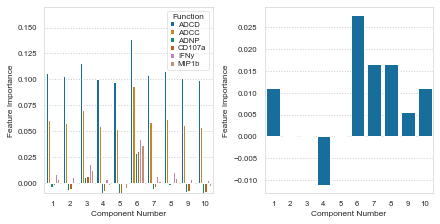

In [45]:
from syserol.figures.common import getSetup
ax, f = getSetup((6, 3), (1, 2))
a = sns.barplot(x="Component Number", y="Feature Importance", hue="Function", data=funcs_df, ax=ax[0])
a.set_ylim(-.015, .17)
b = sns.barplot(x="Component Number", y="Feature Importance", data=class_df, ax=ax[1], color="b")